In [6]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [7]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object

In [8]:
#Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
data = pd.read_csv('Company_Data.csv')
data.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["ShelveLoc"]=le.fit_transform(data["ShelveLoc"])
data["Urban"]=le.fit_transform(data["Urban"])
data["US"]=le.fit_transform(data["US"])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [ ]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
data=data.assign(Sale=pd.cut(data['Sales'],
                               bins=[ 0, 4, 9,15],
                               labels=['Low', 'Medium', 'High']))
data.head(50)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Medium
5,10.81,124,113,13,501,72,0,78,16,0,1,High
6,6.63,115,105,0,45,108,2,71,15,1,0,Medium
7,11.85,136,81,15,425,120,1,67,10,1,1,High
8,6.54,132,110,0,108,124,2,76,10,0,0,Medium
9,4.69,132,113,0,131,124,2,76,17,0,1,Medium


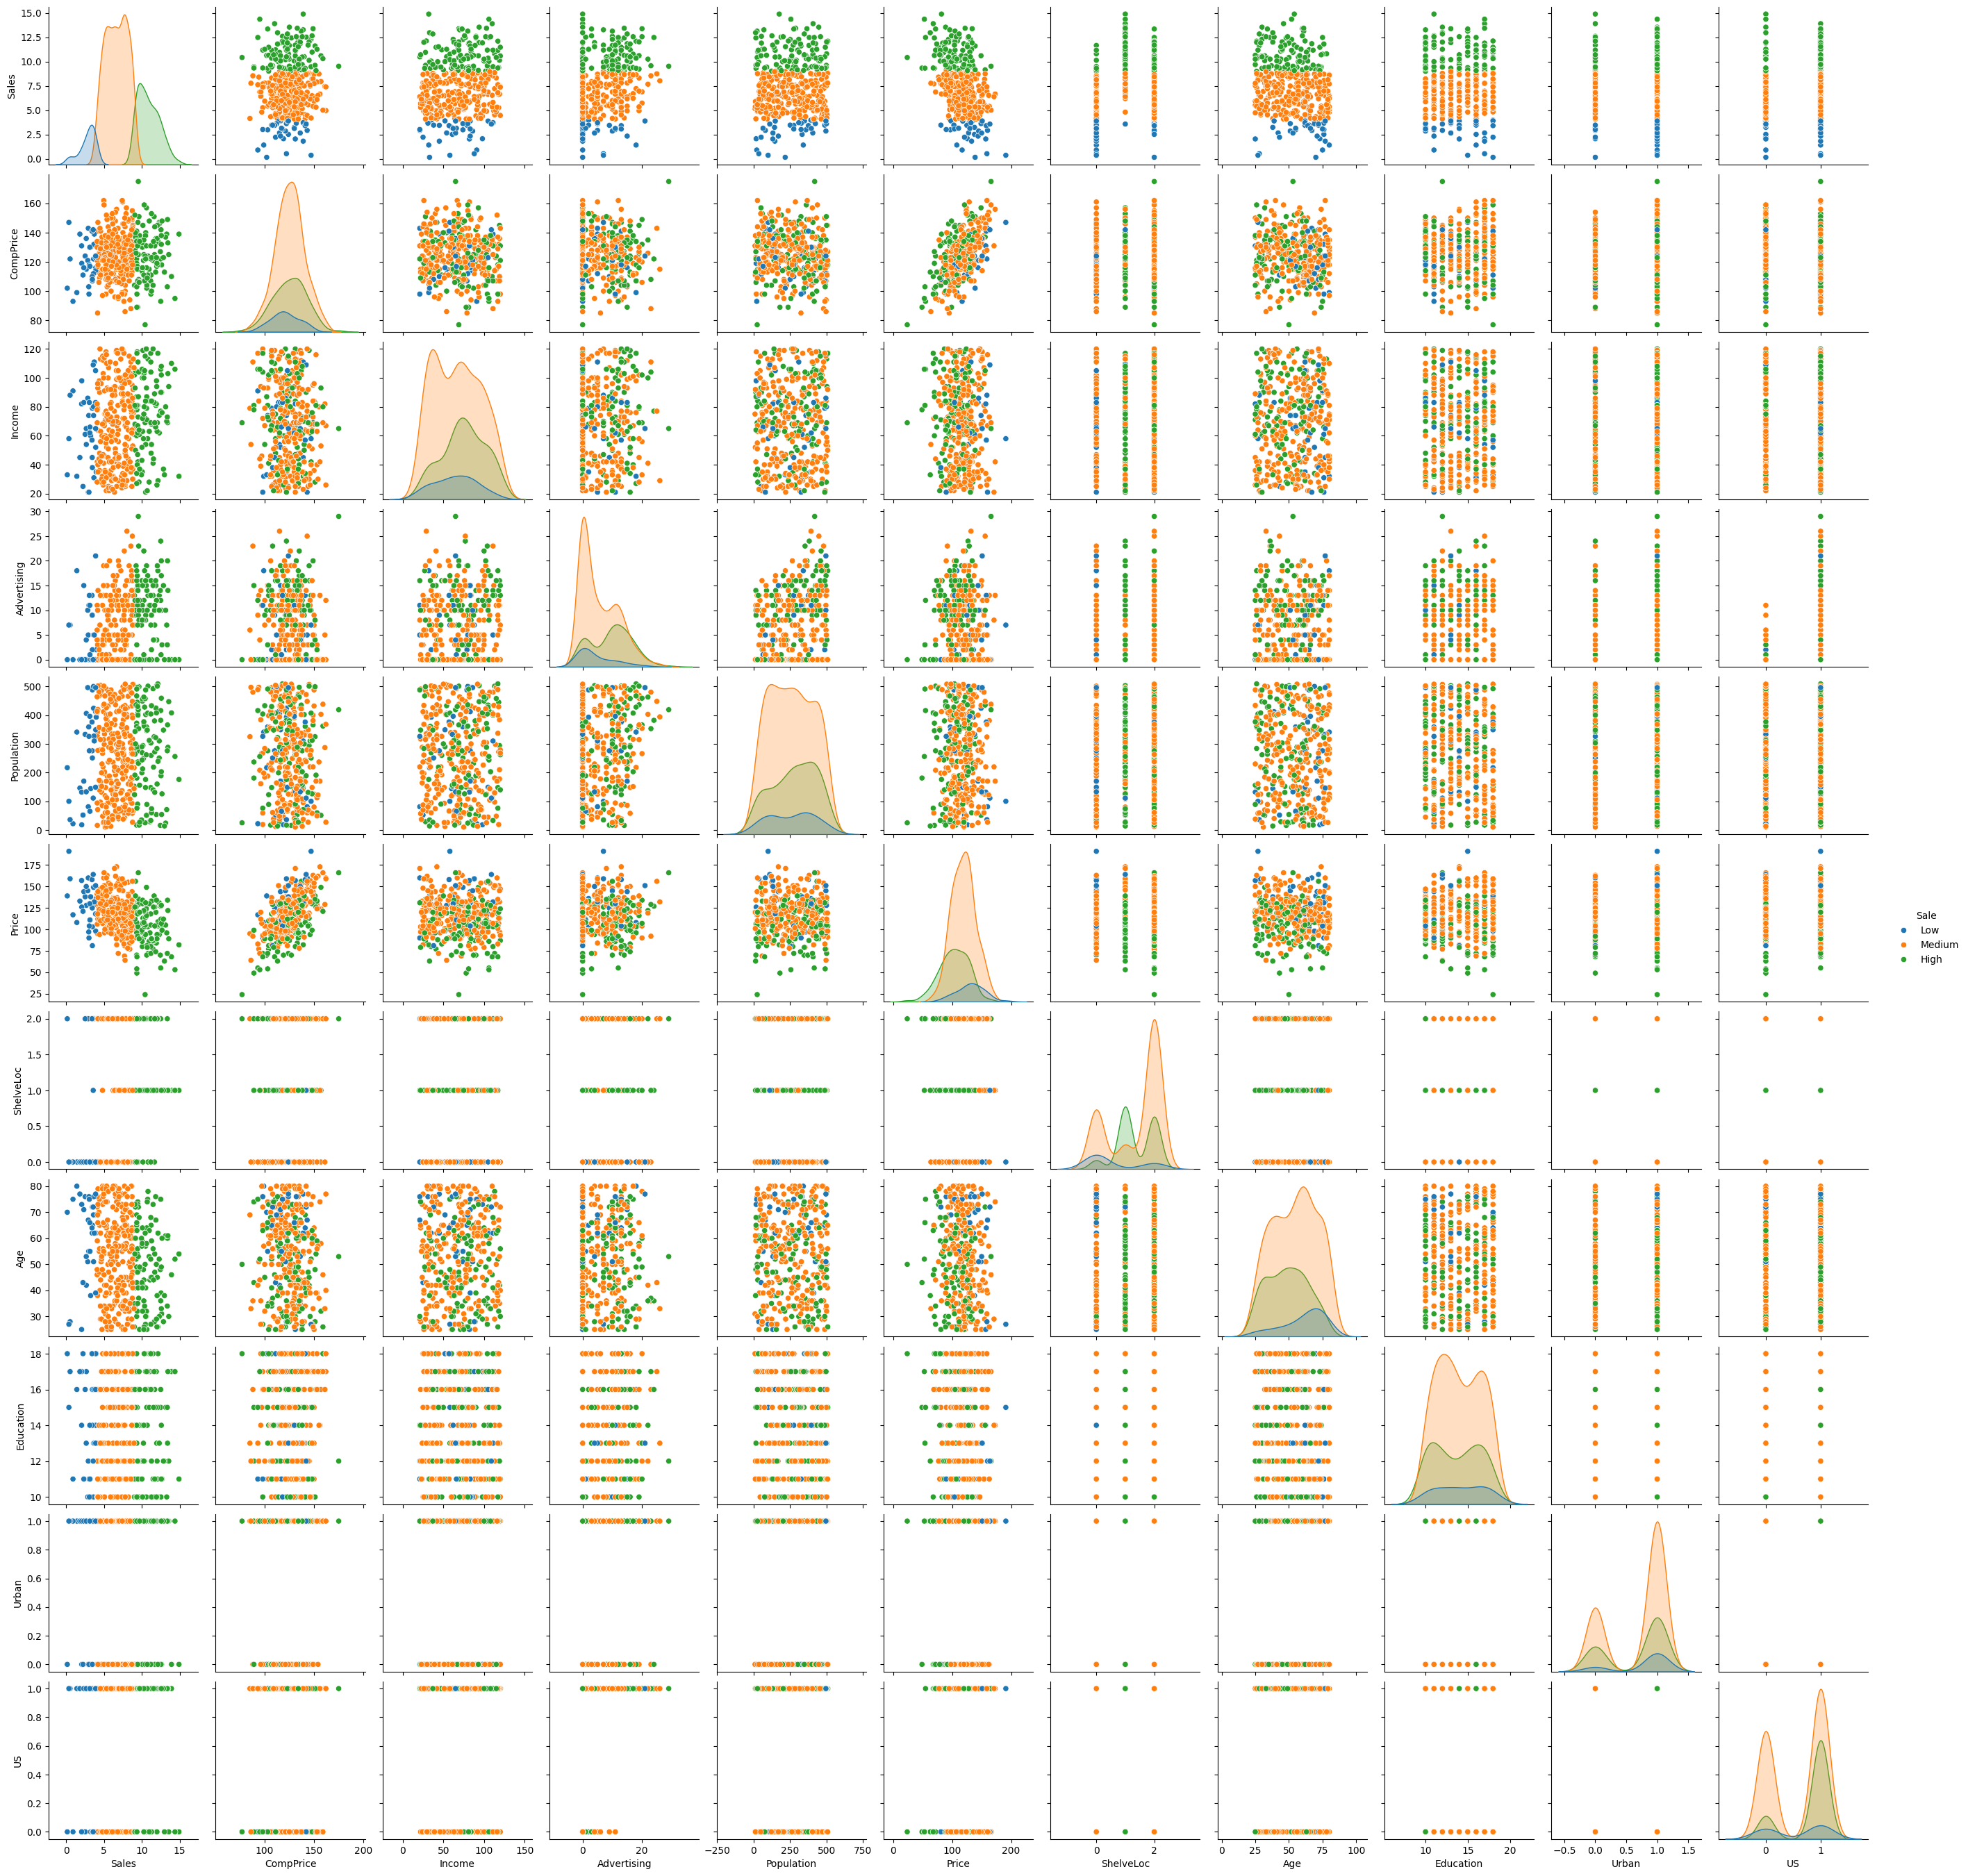

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=data, hue = "Sale")

In [ ]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(data,columns=['Urban','US'], drop_first=True)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Sale,Urban_1,US_1
0,9.50,138,73,11,276,120,0,42,17,High,True,True
1,11.22,111,48,16,260,83,1,65,10,High,True,True
2,10.06,113,35,10,269,80,2,59,12,High,True,True
3,7.40,117,100,4,466,97,2,55,14,Medium,True,True
4,4.15,141,64,3,340,128,0,38,13,Medium,True,False


In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
df['Sale']=df['Sale'].map({'High':1,'Medium':2,'Low':3})
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Sale,Urban_1,US_1
0,9.50,138,73,11,276,120,0,42,17,1,True,True
1,11.22,111,48,16,260,83,1,65,10,1,True,True
2,10.06,113,35,10,269,80,2,59,12,1,True,True
3,7.40,117,100,4,466,97,2,55,14,2,True,True
4,4.15,141,64,3,340,128,0,38,13,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,True,True
396,6.14,139,23,3,37,120,2,55,11,2,False,True
397,7.41,162,26,12,368,159,2,40,18,2,True,True
398,5.94,100,79,7,284,95,0,50,12,2,True,True


In [ ]:
x=df.iloc[:,1:9]
y=df['Sale']

In [ ]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,138,73,11,276,120,0,42,17
1,111,48,16,260,83,1,65,10
2,113,35,10,269,80,2,59,12
3,117,100,4,466,97,2,55,14
4,141,64,3,340,128,0,38,13


In [ ]:
y.head()

0    1
1    1
2    1
3    2
4    2
Name: Sale, dtype: category
Categories (3, int64): [3 < 2 < 1]

In [ ]:
df['Sale'].unique()

[1, 2, 3, NaN]
Categories (3, int64): [3 < 2 < 1]

In [ ]:
df.Sale.value_counts()

Sale
2    251
1    111
3     35
Name: count, dtype: int64

In [ ]:
# Replace NaN values in the specific field with the Maximum Occurance
df['Sale'].fillna(2, inplace=True)


In [ ]:
df['Sale'].unique()

[1, 2, 3]
Categories (3, int64): [3 < 2 < 1]

In [ ]:
df.Sale.value_counts()

Sale
2    254
1    111
3     35
Name: count, dtype: int64

In [ ]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Sale',
 'Urban_1',
 'US_1']

In [ ]:
#Descriptive statistics for each column
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000


In [ ]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Sale,Urban_1,US_1
0,9.50,138,73,11,276,120,0,42,17,1,True,True
1,11.22,111,48,16,260,83,1,65,10,1,True,True
2,10.06,113,35,10,269,80,2,59,12,1,True,True
3,7.40,117,100,4,466,97,2,55,14,2,True,True
4,4.15,141,64,3,340,128,0,38,13,2,True,False


In [ ]:
#Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
#Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
#Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=100,
                          max_depth=6,
                          max_samples=0.6,
                          max_features=0.7,
                          random_state=42)
#Model Fitting
RFR.fit(x_train,y_train)
#Random Forest Prediction
y_pred_train=RFR.predict(x_train)
y_pred_test=RFR.predict(x_test)

In [ ]:
#Metrix
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_train,y_pred_train)
print("Training MSE: ",mse1.round(2))
print("Training RMSE: ",np.sqrt(mse1).round(2))
mse2=mean_squared_error(y_test,y_pred_test)
print("Test MSE: ",mse2.round(2))
print("Test RMSE: ",np.sqrt(mse2).round(2))

print("Variance: ",mse2-mse1)

Training MSE:  0.08
Training RMSE:  0.28
Test MSE:  0.21
Test RMSE:  0.46
Variance:  0.13061731978616936
